In [8]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))

import qiskit 


from qiskit_aqt_provider import AQTProvider
aqt = AQTProvider('6f47670f3e5c414da0cdcab1c048eb97')
print(aqt.backends())
simulator_backend = aqt.backends.aqt_qasm_simulator

import numpy as np

from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from shared.graph_helper import *
from matplotlib import pyplot as plt
%matplotlib inline


[<AQTSimulator('aqt_qasm_simulator')>, <AQTSimulatorNoise1('aqt_qasm_simulator_noise_1')>, <AQTDevice('aqt_innsbruck')>]


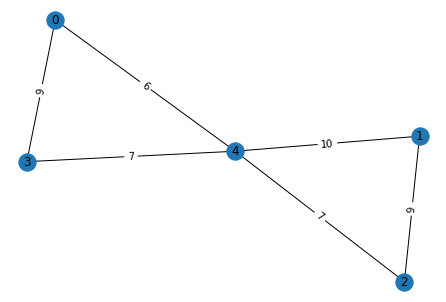

In [9]:
graph = generate_butterfly_graph(with_weights=True)
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
max_cut.draw()

In [10]:
step_size = 0.1
a_gamma = np.arange(0, np.pi, step_size)
b_beta = np.arange(0, np.pi, step_size)


In [11]:
a_gamma, b_beta = np.meshgrid(a_gamma, b_beta)

In [12]:
def run_qaoa(gamma, beta):
    qaoa = QAOA(optimizer=COBYLA(maxiter=0),
                quantum_instance=simulator_backend,
                reps=1,
                initial_point=[gamma, beta])
    algorithm = MinimumEigenOptimizer(qaoa)
    result = algorithm.solve(max_cut_qubo)
    optimal_parameters = qaoa.optimal_params
    mean, distribution = max_cut.analyse(result)

    return mean

In [13]:
F1 = np.zeros(a_gamma.shape)
for i in range(0, len(F1)):
    for j in range(0, len(F1)):
        # F1[i,j] = a_gamma[i][j] * b_beta[i][j]
        F1[i,j] = run_qaoa(a_gamma[i][j], b_beta[i][j])
    print(f"Row {i} done")

Row 0 done
Row 1 done
Row 2 done
Row 3 done
Row 4 done
Row 5 done
Row 6 done
Row 7 done
Row 8 done
Row 9 done
Row 10 done
Row 11 done
Row 12 done


KeyboardInterrupt: 

[[-22.28 -23.61 -23.97 ... -23.77 -25.55 -22.37]
 [-23.59 -21.23 -15.95 ... -30.85 -28.32 -26.67]
 [-24.65 -25.84 -23.87 ... -21.72 -23.4  -24.67]
 ...
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


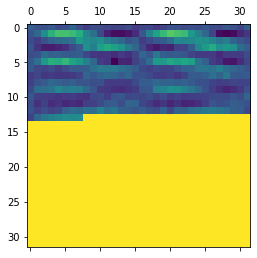

In [14]:
print(F1)
plt.matshow(F1)
plt.show()

In [ ]:
np.mean(F1)

In [ ]:
np.unravel_index(np.argmin(F1), F1.shape)

In [ ]:
np.min(F1)

In [ ]:
np.max(F1)